# Homework 1 - Digital Communications 2022-2 Universidad de Antioquia

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1.
The total delay of three signals is $Y = X_1 + X_2 + X_3$,
where $X_1 ∼ U(1, 10)$, $X_2 ∼ U(5, 15)$, and $X_3 ∼ U(7, 20)$.\
Simulate the total delay $Y$ , with the sum of three random vectors of size 10000, using `scipy.stats.uniform`.





In [2]:
from scipy.stats import uniform  

np.random.seed(0)
size = 10000

x1=uniform(loc = 1, scale = 9)
x2=uniform(loc = 5, scale = 10)
x3=uniform(loc = 7, scale = 13)

y = x1.rvs(size=size) + x2.rvs(size=size) + x3.rvs(size=size)

y.shape, y.max()

((10000,), 44.14796432898352)

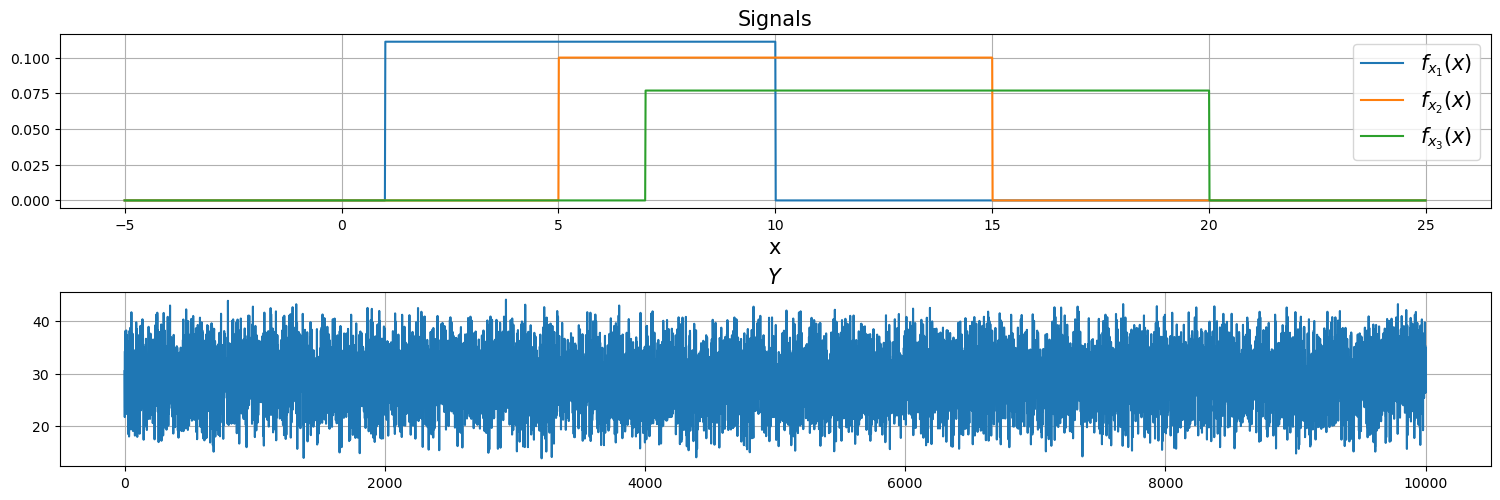

In [3]:
t = np.arange(-5, 25, 0.01)

plt.figure(figsize=(15,5));
plt.subplot(2,1,1);
plt.title('Signals', fontsize=15)
plt.plot(t, x1.pdf(t), label = '$f_{x_1}(x)$')
plt.plot(t, x2.pdf(t), label = '$f_{x_2}(x)$')
plt.plot(t, x3.pdf(t), label = '$f_{x_3}(x)$')
plt.xlabel('x', fontsize = 15)
plt.grid()
plt.legend(fontsize=15);
plt.subplot(2,1,2);
plt.title('$Y$', fontsize = 15)
plt.plot(y)
plt.grid()
plt.tight_layout(pad=0.7)


### a. Plot the histogram of $Y$





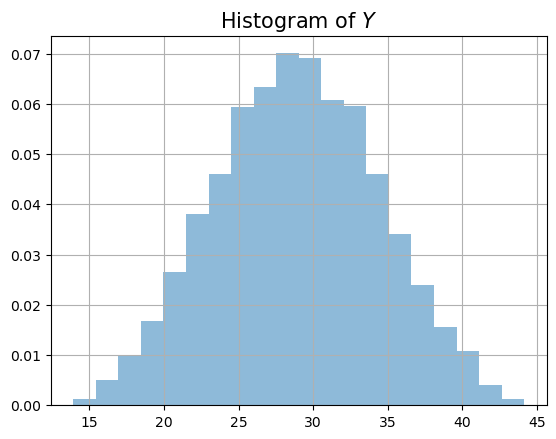

In [4]:
plt.hist(y, bins=20, alpha=0.5, histtype='stepfilled', density=True);
plt.grid()
plt.title('Histogram of $Y$', fontsize=15);

### b. Calculate the $P(Y ≥ 25)$ in simulated array

In [5]:
print(f'P(Y ≥ 25) = {sum(y>25)/len(y)}')

P(Y ≥ 25) = 0.7537


### c. Find $f_Y(y)$ using the convolution of $f_{X_1}(x_1)$, $f_{X_2}(x_2)$ and $f_{X_3}(x_3)$, and plot the result. Plot $f_y(y)$ and compare with histogram.

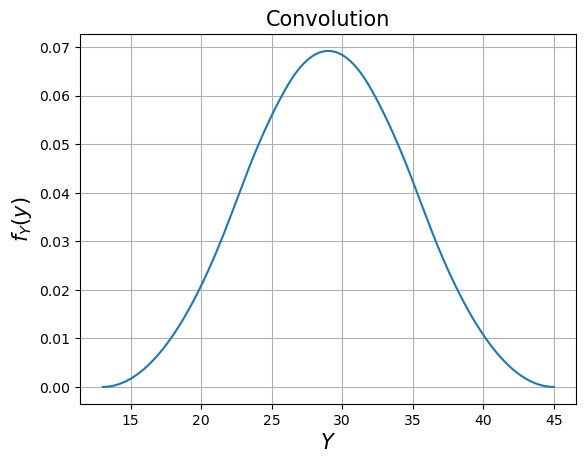

In [6]:
x1_range = np.arange(1, 10, 0.01)
x2_range = np.arange(5, 15, 0.01)
x3_range = np.arange(7, 20, 0.01)

y_range = np.arange(13, 45, 0.01)

px1 = x1.pdf(x1_range)
px2 = x2.pdf(x2_range)
px3 = x3.pdf(x3_range)

fy = np.convolve(px1, px2, )
fy *= 0.01
fy = np.convolve(fy, px3)
fy *= 0.01

plt.plot(y_range[2:], fy);
plt.grid();
plt.title('Convolution', fontsize=15);
plt.xlabel('$Y$', fontsize=15);
plt.ylabel('$f_Y(y)$', fontsize=15);

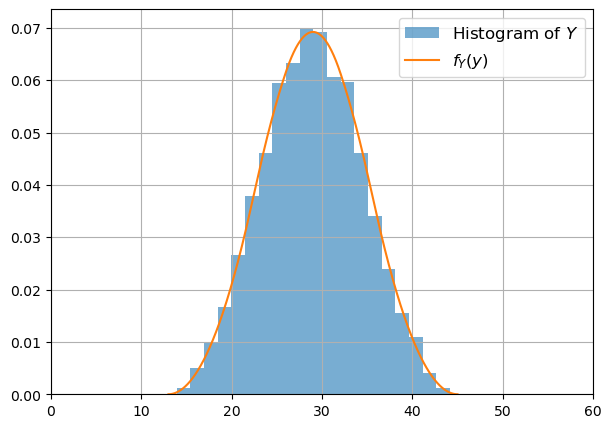

In [7]:
plt.figure(figsize=(7,5))
plt.hist(y, bins=20, alpha=0.6, histtype='stepfilled', density=True, label = 'Histogram of $Y$');
plt.plot(y_range[2:], fy, label = '$f_Y(y)$');
plt.grid();
plt.xlim((0, 60))
plt.legend(fontsize=12);

In [8]:
print(f'P(Y ≥ 25) = {sum(fy[y_range[2:] > 25])}')

P(Y ≥ 25) = 75.88320085470103


The probability $P(Y ≥ 25)$ in the histogram and the convolution is almost the same in the both results, $75.8\%$

## 2.

A source generates four symbols $X = \{−2, −1, 0, 1\}$ with $p_X = \{0.5, 0.25, 0.15, 0.1\}$. A channel affects the reception of each symbol with the following conditional densities $Y|X_1 ∼ N(−2, 1), Y |X_2 ∼ N(−1, 0.5), Y |X_3 ∼ N(0, 0.3),$ and $Y|X_4 ∼ N(1, 0.7)$.

In [9]:
from scipy.stats import norm 

x = [-2, -1, 0, 1]
px = [0.5, 0.25, 0.15, 0.1]

xva = [norm(loc=-2, scale=1),
       norm(loc=-1, scale=0.5),
       norm(loc=-0, scale=0.3),
       norm(loc=1, scale=0.7)]

### a. Four symbols are transmitted, and assume that the received signal is $Y = \{−1.8, −0.8, 0.8, 1.8\}$. Calculate the probabilities $P(X_i|Y )$ from Bayes theorem, and decide the most likely received symbol.

In [10]:
from numpy.core.fromnumeric import argmax

y = [-1.8, -0.8, 0.8, 1.8]
xh = []
Pmax = []

def transmitted_symbol(y, x, px, xva):
    def py(y, px, xva):
        py = []
        for i in range(len(y)):
            p_aux = 0
            for j in range(len(x)):
                p_aux += px[j]*xva[j].pdf(y[i])
            py.append(p_aux)
        return py

    p_y = py(y, px, xva)

    for i in range(len(p_y)):
        p_aux = [] 
        print(f'Calculation of probabilities with = {y[i]}\n')
        for j in range(len(px)):
            p = px[j]*xva[j].pdf(y[i])/p_y[i]
            p_aux.append(p)
            print(f'P(X = {x[j]:2} | Y = {y[i]}) = {p:0.3e}')
    
        print()
        print(f'Sum of the probabilities: {sum(p_aux):5.2f}\n')
        print(f'Decision Y = {x[argmax(p_aux)]}, with probability {max(p_aux):0.3f}\n')
        print('*-'*40)
        print()
        xh.append(x[argmax(p_aux)])
        Pmax.append(max(p_aux))

transmitted_symbol(y, x, px, xva)

for i, yi in enumerate(y):
    print(f'y{i+1} = {yi : 2}, xh{i+1} = {xh[i] : 2}, Pmax = {Pmax[i]}')

Calculation of probabilities with = -1.8

P(X = -2 | Y = -1.8) = 7.790e-01
P(X = -1 | Y = -1.8) = 2.210e-01
P(X =  0 | Y = -1.8) = 1.210e-08
P(X =  1 | Y = -1.8) = 7.617e-05

Sum of the probabilities:  1.00

Decision Y = -2, with probability 0.779

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

Calculation of probabilities with = -0.8

P(X = -2 | Y = -0.8) = 3.359e-01
P(X = -1 | Y = -0.8) = 6.371e-01
P(X =  0 | Y = -0.8) = 1.972e-02
P(X =  1 | Y = -0.8) = 7.229e-03

Sum of the probabilities:  1.00

Decision Y = -1, with probability 0.637

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

Calculation of probabilities with = 0.8

P(X = -2 | Y = 0.8) = 6.119e-02
P(X = -1 | Y = 0.8) = 4.731e-03
P(X =  0 | Y = 0.8) = 8.810e-02
P(X =  1 | Y = 0.8) = 8.460e-01

Sum of the probabilities:  1.00

Decision Y = 1, with probability 0.846

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

Calculation o

### b. Generate $X_{1000 \times 1}^{\operatorname{train}}$ input symbols an the correspondent received sequence from the channel $Y_{1000 \times 1}^{\operatorname{train}}$, based on the distribution $f(Y |X_i)$. Use `GaussianNB` from `sklearn` library to estimate(`predict`) the most likely received symbol from $Y = \{−1.8, −0.8, 0.8, 1.8\}$. Compare with previous result.

In [11]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(0)
N = 1000

x_random = np.random.choice(x, p = px, size = N)
y_label = np.copy(x_random)

mu = 0
sigma = 1

noise = []
for i in x_random:
    if i == -2:
        noise.append(xva[0].rvs(1))
    if i == -1:
        noise.append(xva[1].rvs(1))
    if i == -0:
        noise.append(xva[2].rvs(1))
    if i == 1:
        noise.append(xva[3].rvs(1))

noise = np.array(noise).reshape(N)

x_train = np.array(noise)

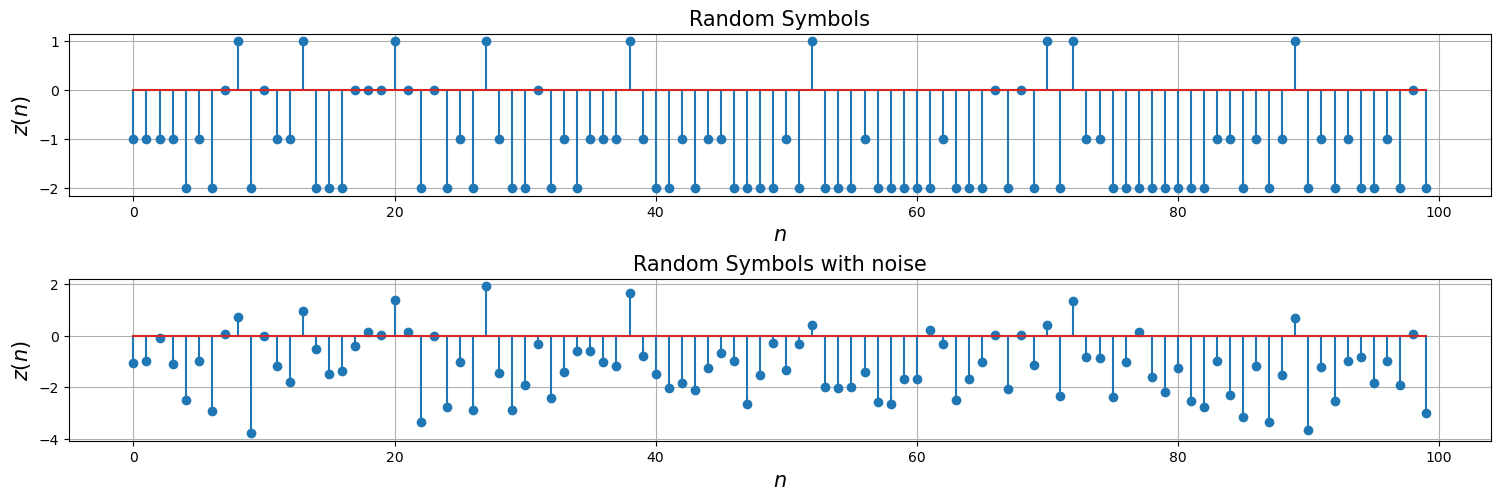

In [12]:
plt.figure(figsize=(15,5));
plt.subplot(2,1,1);
plt.title('Random Symbols', fontsize = 15)
plt.stem(x_random[:100], use_line_collection=True);
plt.xlabel('$n$', fontsize = 15);
plt.ylabel('$z(n)$', fontsize = 15);
plt.grid();
plt.subplot(2,1,2);
plt.title('Random Symbols with noise', fontsize = 15)
plt.stem(x_train[:100], use_line_collection=True);
plt.xlabel('$n$', fontsize = 15);
plt.ylabel('$z(n)$', fontsize = 15);
plt.grid();
plt.tight_layout(pad=0.7)

In [13]:
model = GaussianNB()
model.fit(x_train.reshape(-1,1), y_label)

GaussianNB()

In [14]:
predictions = model.predict(np.array(y).reshape(-1,1))
prob = model.predict_proba(np.array(y).reshape(-1,1))
prob = np.array([max(i) for i in prob]).reshape(-1)
print(f'Predictions: {predictions}')
print(f'Probabilities: {prob}')

Predictions: [-2 -1  1  1]
Probabilities: [0.79633811 0.61836659 0.87601639 0.99433892]


## 3. 

A source generates two symbols (in two dimenssions) from a correlated bivariate normal distribution, with parameters:


\begin{equation}
\begin{array}{lll}
X=1: & \boldsymbol{\mu}_1=\left[\begin{array}{c}
1 \\ -1
\end{array}\right] & \boldsymbol{\Sigma}_1=\left[\begin{array}{cc}
2 & -2 \\ -2 & 4
\end{array}\right] \\
X=2: & \boldsymbol{\mu}_2=\left[\begin{array}{l}
3 \\ 3
\end{array}\right] & \boldsymbol{\Sigma}_{\mathbf{2}}=\left[\begin{array}{cc}
1 & -1 \\
-1 & 4
\end{array}\right]
\end{array}
\end{equation}

Generate $100$ sequences from each symbol, $X_{100 \times 2}^1$
and $X_{100 \times 2}^2$, and the received sequence $Y_{200 \times 2}^{train}$,
(`multivariate_normal` in `scipy.stats`):

In [15]:
from scipy.stats import multivariate_normal

x = [1, 2]

mu1 = np.array([1, -1]); sigm1 = np.array([[2, -2], [-2, 4]])
mu2 = np.array([3, 3]); sigm2 = np.array([[1, -1], [-1, 4]])

xv1 = multivariate_normal(mean = mu1, cov = sigm1).rvs(100)
xv2 = multivariate_normal(mean = mu2, cov = sigm2).rvs(100)
xv = np.vstack((xv1, xv2))

### a. Plot the sequences $X_{100 \times 2}^1, X_{100 \times 2}^2$ (scatter plot)

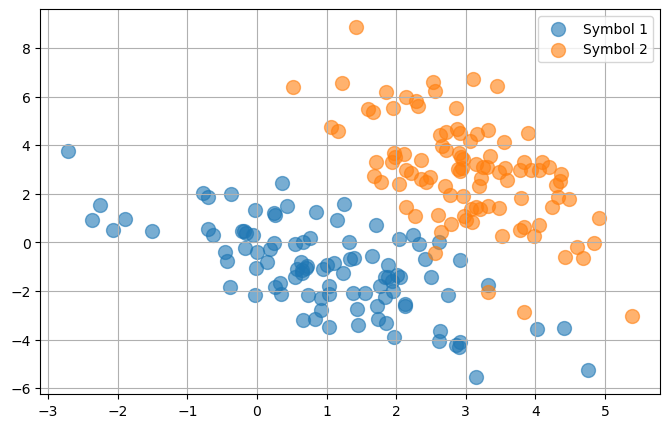

In [16]:
plt.figure(figsize = (8,5))
plt.grid();
plt.scatter(xv1[:,0], xv1[:,1], alpha=.6, s=100, label='Symbol 1');
plt.scatter(xv2[:,0], xv2[:,1], alpha=.6, s=100, label='Symbol 2');
plt.legend();

### b. Four symbols are transmitted, and assume that the received signal is $Y = \{[1, 4], [4, −2], [0, 2], [1, 3.5]\}$. Use `GaussianNB` from `sklearn` library to estimate (command `predict`) the most likely received symbols.

In [17]:
y = np.array([[1,4], [4, -2], [0, 2], [1, 3.5]])

pos = np.arange(200); np.random.shuffle(pos)

y_label = np.hstack((np.ones(100), np.ones(100)+1))
x_train = xv[pos]; y_label = y_label[pos]

model = GaussianNB()
model.fit(x_train, y_label)
model.predict_proba(y)


array([[0.13601516, 0.86398484],
       [0.63055496, 0.36944504],
       [0.96444175, 0.03555825],
       [0.23510769, 0.76489231]])

In [18]:
model.predict(y)

array([2., 1., 1., 2.])

## 4.

Let $X(t) = sin(ω + ϕ)$, where $ω ∼ U(8, 12)$ and $φ ∼ U(0, 2π)$. Generate $N = 2000$ sample functions, with a sampling frequency per function of $f_s = 1kHz$, for a signal duration of 5 seconds.

In [19]:
from scipy.stats import uniform  

fs = 1000
N = 2000
np.random.seed(1)
omega = uniform(loc = 2*np.pi*8, scale = 2*np.pi*12 - 2*np.pi*8).rvs(N)
phi = uniform(loc = 0, scale = 2 * np.pi).rvs(N)
t = np.linspace(0, 5, fs)
x = np.zeros((N,fs))

for i in range(N):
    x[i] = np.sin(omega[i] * t + phi[i])

### a. plot the ensemble and time average. Is the process ergodic in the mean?

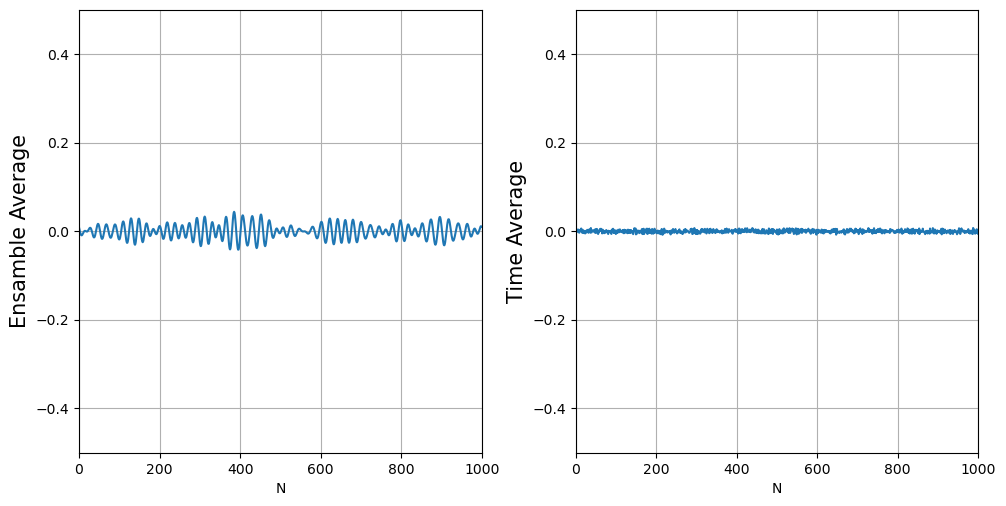

In [20]:
x_ensamble = np.mean(x, axis = 0)
x_time = np.mean(x, axis = 1)

plt.figure(figsize=(10,5));
plt.subplot(121);
plt.plot(x_ensamble);
plt.xlabel('N');
plt.ylabel('Ensamble Average', fontsize=15);
plt.ylim(-0.5, 0.5);
plt.xlim(0, 1000);
plt.grid();
plt.subplot(122);
plt.plot(x_time);
plt.xlabel('N');
plt.ylabel('Time Average', fontsize=15)
plt.ylim(-0.5, 0.5);
plt.xlim(0, 1000);
plt.grid();
plt.tight_layout(pad=0.5)

The process is ergodic in the mean

### b. plot the ensemble and time autocorrelation function. Is the process ergodic in the autocorrelation?

In [21]:
rxxu = np.correlate(x[0,:],x[0,:], mode='same')
rxxt = rxxu/rxxu.size
rxxe=np.zeros(N)
for i in range(fs):
    rxxe[i] = np.correlate(x[:,0],x[:,i])/N

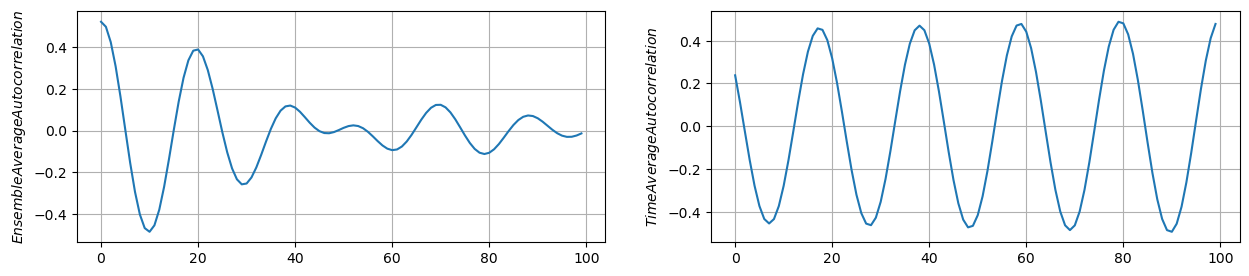

In [22]:
plt.figure(figsize=(15,3)) 
plt.subplot(1,2,1) 
plt.plot(rxxe[0:100]); 
plt.grid();
plt.ylabel('$Ensemble Average Autocorrelation$') 
plt.subplot(1,2,2)
plt.ylabel('$Time Average Autocorrelation$')
plt.plot(rxxt[400:500]);
plt.grid();

The process is ergodic in the autocorrelation

## 5.

Simulate a white noise with a gaussian vector $X$ with zero mean, $N_0 = 0.01W/Hz$,$fs = 2kHz$, and $N = 10000$ samples.


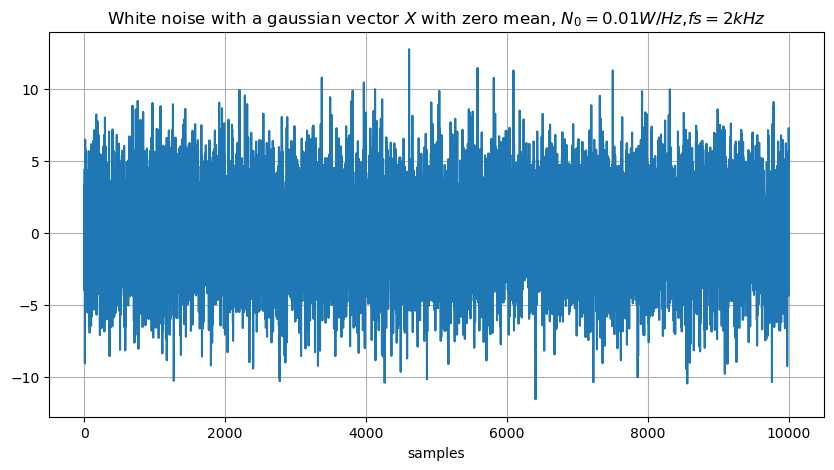

In [23]:
N = 10000
N_0 = 0.01
fs = 2000
noise_power = N_0 * fs / 2 

x = np.random.normal(loc=0, scale=np.sqrt(noise_power), size=N)

plt.figure(figsize=(10,5))
plt.title('White noise with a gaussian vector $X$ with zero mean, $N_0 = 0.01W/Hz$,$fs = 2kHz$');
plt.plot(x);
plt.xlabel('samples');
plt.grid();

### a. Find the autocorrelation function $R_{XX}(τ)$, using `signal.correlate`, and plot the result. Compare the maximum value of $R_{XX}(τ)$ with the noise power in bandwidth: $\frac{f_s \cdot N_0}{2}$

Noise Power in Bandwidth (W) is fs·N0 / 2: 10.0
Max RXX(τ) is: 10.005
Noise Power (W/Hz): 0.010
Noise Power dB: -19.998


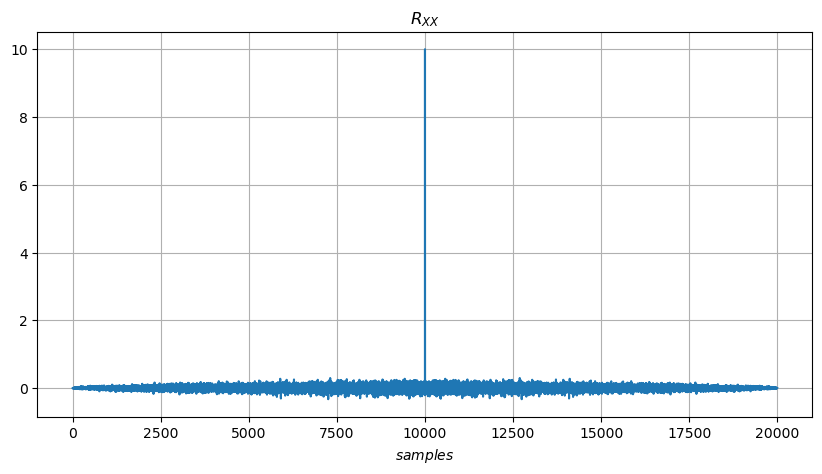

In [24]:
from scipy.signal import correlate 

corr = correlate(x, x, mode='full')/(x.size)

plt.figure(figsize = (10, 5)) 
plt.plot(corr) 
plt.title('$R_{XX}$') 
plt.xlabel('$samples$') 
plt.grid()

print(f'Noise Power in Bandwidth (W) is fs·N0 / 2: {fs*N_0/2}')
print(f'Max RXX(τ) is: {max(corr):0.3f}')            
print(f'Noise Power (W/Hz): {(max(corr)*2)/fs:0.3f}')   
print(f'Noise Power dB: {10*np.log10((max(corr)*2)/fs):0.3f}')  

The maximum value calculated from the autocorrelation is almost the same calculated from the noise power in bandwidth

### b. Find the power spectral density with:

\begin{equation}
S_{n n}=10 \log _{10}\left(\left|\mathcal{F}\left\{R_{X X}(\tau)\right\}\right|\left(2 / f_s\right)\right)
\end{equation}

using `fft`, from `scipy.fftpack`, and plot the result.
Compare the average noise power with the average from `psd` command from `matplotlib.pyplot`




The mean of psd is: 0.0038331673155275227
The mean of noise power is: 0.005002358775044846


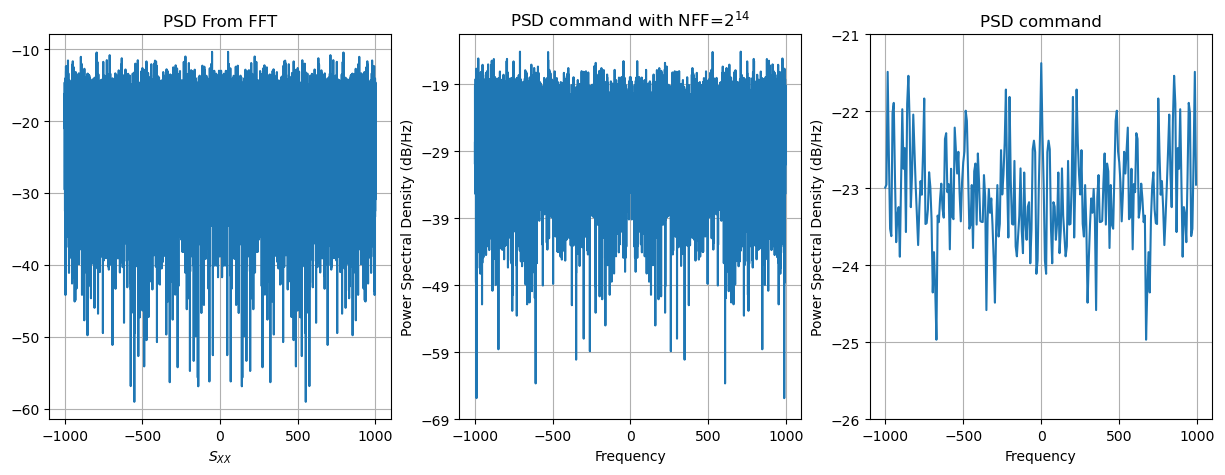

In [25]:
from scipy.fftpack import fft, fftfreq

Sxx = 10*np.log10(abs(fft(corr))*(2/fs))

n_freq = fftfreq(len(Sxx), 1/fs)

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1) 
plt.title('PSD From FFT');
plt.plot(n_freq, Sxx) 
plt.xlabel('$S_{XX}$') 
plt.grid()
plt.subplot(1, 3, 2)
Px_den,f = plt.psd(x, Fs=fs, NFFT=2**14, Fc=0, sides = "twosided");
plt.title('PSD command with NFF=$2^{14}$');
plt.subplot(1, 3, 3)
plt.psd(x, Fs=fs, Fc=0, sides = "twosided");
plt.title('PSD command');

print(f'The mean of psd is: {np.mean(Px_den)}')
print(f'The mean of noise power is: {(max(corr)*2)/(fs*2)}') 

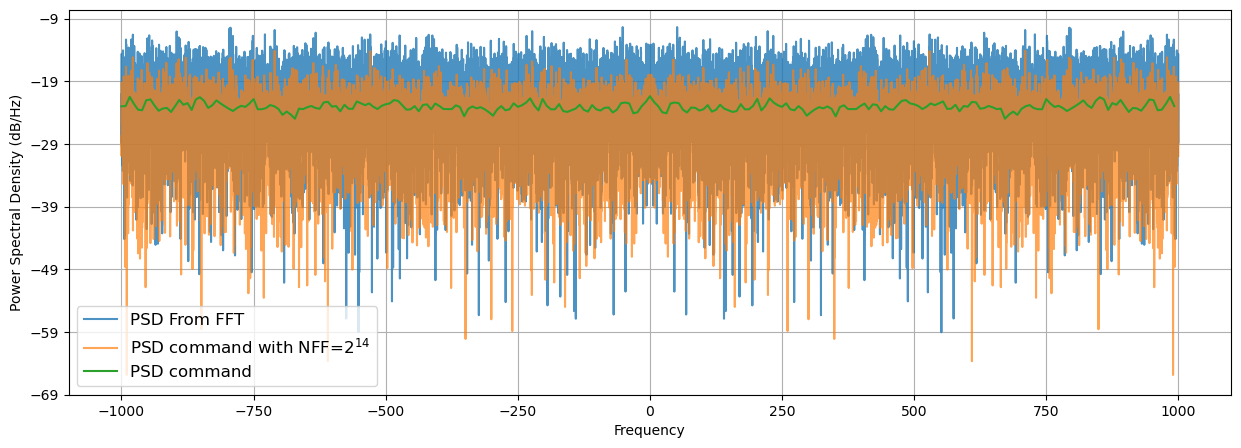

In [26]:
plt.figure(figsize = (15, 5))
plt.plot(n_freq, Sxx, alpha = 0.8, label = 'PSD From FFT')
plt.psd(x, Fs=fs, NFFT=2**14, Fc=0, sides = "twosided", alpha = 0.7, label = 'PSD command with NFF=$2^{14}$');
plt.psd(x, Fs=fs, Fc=0, sides = "twosided", label = 'PSD command');
plt.legend(fontsize=12)

## 6.

Generate a signal $X(t)$, a binary random sequence $(X =
\{−2, +2\})$ of $500$ symbols, with $10$ samples per symbol,
with $f_s = 1kHz$ equivalent to $5$ seconds of signal duration,
and power $P_X = 4$ Watts. The signal $X(t)$ pass through a
channel with AWGN, $Y(t) = X(t) + N(t)$.


In [27]:
fs = 1000
N = 10
T = 5
cant_symbols = 500
symbols = [-2, 2]

random_symbols = np.random.choice(symbols, size = cant_symbols)

t = np.arange(cant_symbols * N)/fs
#t = np.linspace(0, T, (cant_symbols * N)) / fs
x = np.zeros((cant_symbols,N))

for i in range(cant_symbols):
    x[i] = random_symbols[i] 

x = x.reshape(-1)

### a. Add the gaussian noise correspondent to a $SNR=-1dB$, and plot $X(t)$, and $Y(t)$

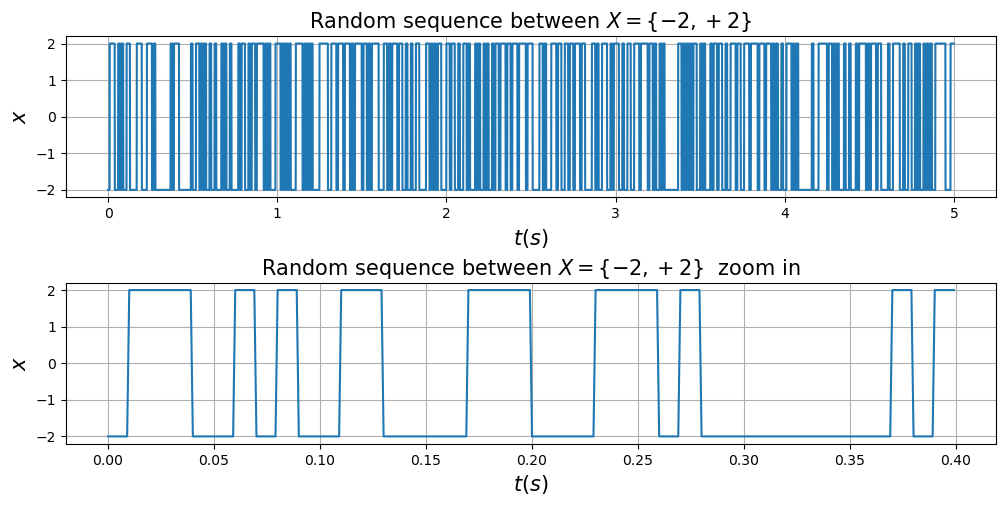

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(211);
plt.title('Random sequence between $X =\{−2, +2\}$', fontsize=15);
plt.plot(t,x);
plt.xlabel('$t(s)$', fontsize=15)
plt.ylabel('$x$', fontsize=15)
plt.grid();
plt.subplot(212);
plt.title('Random sequence between $X =\{−2, +2\}$  zoom in', fontsize=15);
plt.plot(t[:400],x[:400]);
plt.xlabel('$t(s)$', fontsize=15)
plt.ylabel('$x$', fontsize=15)
plt.grid();
plt.tight_layout(pad=0.5);

Noise power: 5.036 W
N0: 1.007e-02 W/Hz
Signal power: 4.000 W
Signal duration: 5.000 s


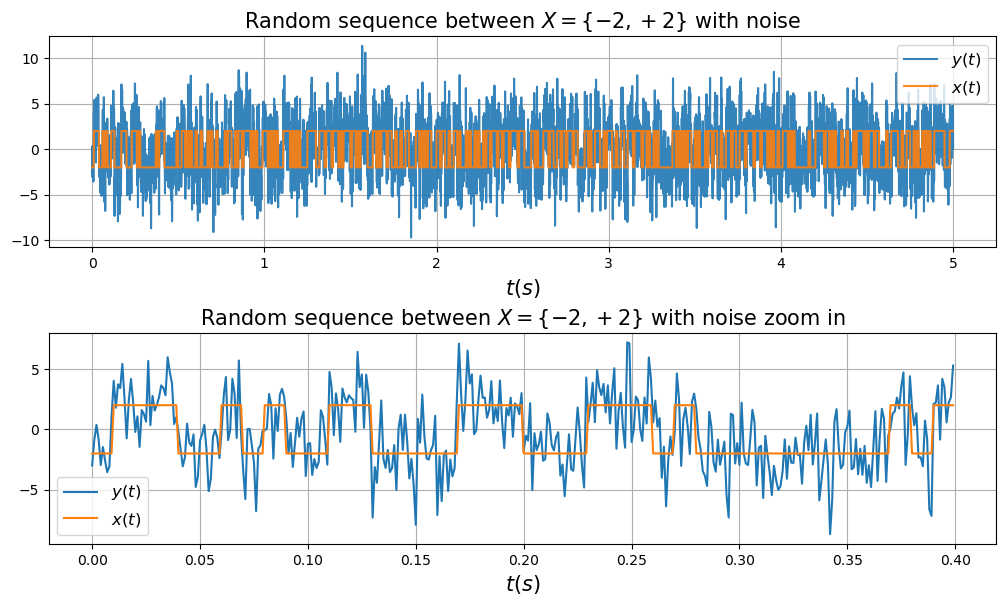

In [29]:
SNRdB = -1
Px = 4
Pn = Px / (10**(SNRdB/10))
print(f'Noise power: {Pn:0.3f} W')
print(f'N0: {(Pn*2)/fs:0.3e} W/Hz')
print(f'Signal power: {Px:0.3f} W')
print(f'Signal duration: {T:0.3f} s')

noise = norm(loc=0, scale=np.sqrt(Pn)).rvs(len(x))

y = x + noise

plt.figure(figsize=(10,6))
plt.subplot(211);
plt.title('Random sequence between $X =\{−2, +2\}$ with noise', fontsize=15);
plt.plot(t,y, alpha = 0.9, label = '$y(t)$');
plt.plot(t,x, alpha = 0.9, label = '$x(t)$');
plt.xlabel('$t(s)$', fontsize=15)
plt.grid();
plt.legend(fontsize=12);
plt.subplot(212);
plt.title('Random sequence between $X =\{−2, +2\}$ with noise zoom in', fontsize=15);
plt.plot(t[:400],y[:400], label = '$y(t)$');
plt.plot(t[:400],x[:400], label = '$x(t)$');
plt.xlabel('$t(s)$', fontsize=15)
plt.legend(fontsize=12);
plt.grid();
plt.tight_layout(pad=0.5);


### b. Plot the autocorrelation functions $R_{XX}$ and $R_{YY}$

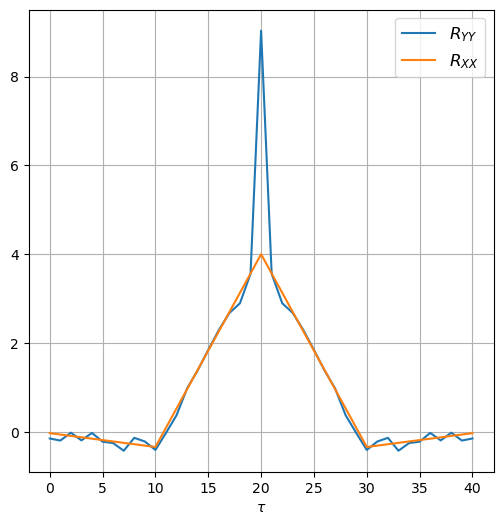

In [30]:
from scipy.signal import correlate 

window = 2*N

corr_x = correlate(x, x, mode='full')/x.size
center_tau = np.arange(x.size-1-window,x.size+window)
tau = np.arange(0,2*window+1)

corr_y = correlate(y, y, mode='full')/y.size
center_tau = np.arange(y.size-1-window,y.size+window)
tau = np.arange(0,2*window+1)

plt.figure(figsize = (6, 6))
plt.plot(tau,corr_y[center_tau], label = '$R_{YY}$')
plt.plot(tau,corr_x[center_tau], label = '$R_{XX}$')
plt.xlabel(r'$\tau$')
plt.grid()
plt.legend(fontsize=12);

### c. Plot the power spectral densities $S_{XX}$, and $S_{YY}$.

Ideal SNR: -1.000 dB
Simulated Noise Power: 5.036 W
Simulated SNR: -1.000 dB
Signal + noise power: 9.036 W
From PSD: 9.320


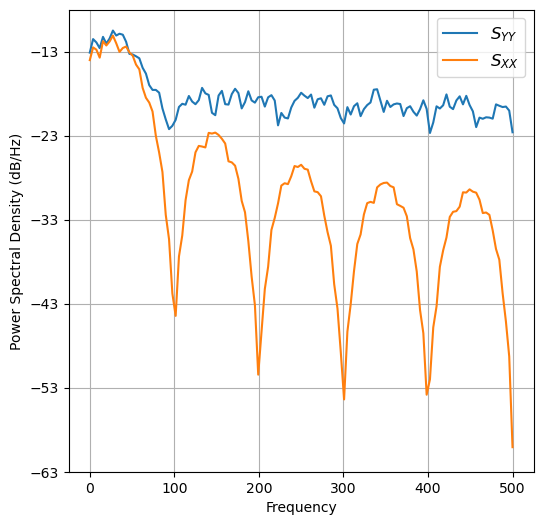

In [31]:
plt.figure(figsize = (6, 6))
plt.grid();
Py_den,f = plt.psd(y, Fs=fs, Fc=0, sides = "onesided", label = '$S_{YY}$');
plt.psd(x, Fs=fs, Fc=0, sides = "onesided", label = '$S_{XX}$');
plt.legend(fontsize=12);


Pn = max(corr_y) - max(corr_x)
Px = max(corr_x)

print(f'Ideal SNR: {-1:0.3f} dB')
print(f'Simulated Noise Power: {Pn:0.3f} W')
print(f'Simulated SNR: {10*np.log10(Px/Pn):0.3f} dB')
print(f'Signal + noise power: {max(corr_y):0.3f} W')

print(f'From PSD: {np.mean(Py_den)*fs/2:0.3f}')

## 7.

Let $x(t)$ be the received signal with noise, where $n \sim$ $N(0, \sigma=0.05)$

\begin{equation}
x(t)=0.5 \sin (2 \pi 20 t)+0.3 \sin (2 \pi 80 t)+n(t)
\end{equation}

In [32]:
fs = 200
T = 5
N = T * fs
t = np.linspace(0, T, N)

# signal
noise = np.random.normal(loc=0, scale=0.05, size=N) 

x = 0.5*np.sin(2*np.pi*20*t) + 0.3*np.sin(2*np.pi*80*t) + noise

### a. Determine the coefficients of the $AR(4)$ estimator of $x(t)$, using the Yule Walker equations

In [33]:
rx = np.correlate(x, x, mode='full')
rx = rx / np.max(rx)

K=10
low = int(len(x))-1
high = int(len(x))+K
acf = rx[low:high]

r1=acf[1]
r2=acf[2]
r3=acf[3]
r4=acf[4] 

R=np.matrix([[1,r1,r2,r3],
             [r1,1,r1,r2],
             [r2,r1,1,r1],
             [r3,r2,r1,1]])

b=np.matrix([[r1],[r2],[r3],[r4]])
coeffs = np.asarray(np.linalg.solve(R,b))

print('Rx:\n')
print(R)
print()
print('b:\n')
print(b)
print()
print('Estimated coefficients AR(4):\n')
print(coeffs)

Rx:

[[ 1.          0.36978392  0.30603663 -0.14445651]
 [ 0.36978392  1.          0.36978392  0.30603663]
 [ 0.30603663  0.36978392  1.          0.36978392]
 [-0.14445651  0.30603663  0.36978392  1.        ]]

b:

[[ 0.36978392]
 [ 0.30603663]
 [-0.14445651]
 [-0.79400904]]

Estimated coefficients AR(4):

[[ 0.00870244]
 [ 0.60480193]
 [-0.01062834]
 [-0.97391327]]


### b. Plot the estimated PSD (`psd` command), and the parametric PSD from Yule Walker equations

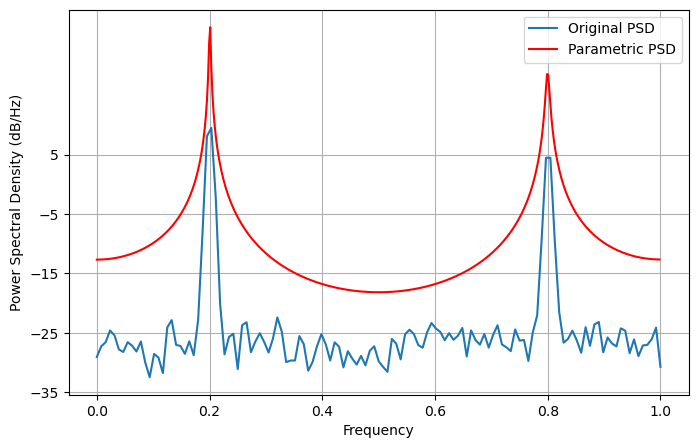

In [34]:
from scipy.signal import freqz

a=[ 1, -coeffs[0,0], -coeffs[1,0], -coeffs[2,0], -coeffs[3,0] ]

[w,H] = freqz(1, a)
plt.figure(figsize = (8,5));
plt.psd(x, label='Original PSD');
plt.plot(w/np.pi, 20*np.log10(abs(H)/np.pi),'r', label='Parametric PSD')
plt.legend();